In [197]:
using FiniteDifferences
using LinearAlgebra
using Plots

In [408]:
function x(t)
    return [cos(t); sin(cos(t)); cos(sin(cos(t))); sin(cos(sin(cos(t))))]
end

x (generic function with 1 method)

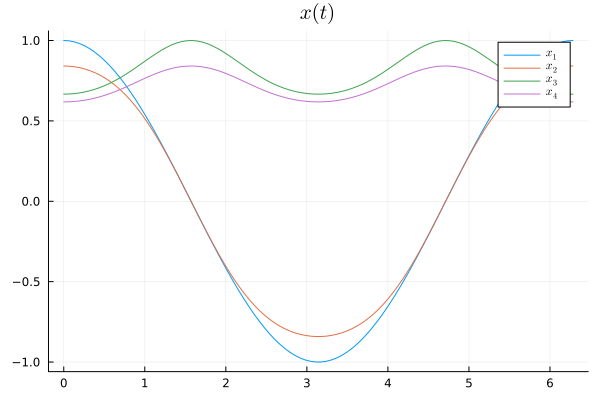

In [409]:
# Plot the trajectory of x(t) for t in [0, 2π]
ts = range(0, 2π, length=100)
xs = reduce(hcat, x.(t))
plot(ts, xs', label=["\$x_1\$" "\$x_2\$" "\$x_3\$" "\$x_4\$"], title="\$x(t)\$")

In [403]:
function diffFrame(x, t, p=15)
    derivatives = reduce(hcat, (n -> central_fdm(p, n)(x, t)).(1:4))
    return Matrix(qr(derivatives).Q)
end

diffFrame (generic function with 2 methods)

In [404]:
function diffFrameDot(x, t, p=5)
    return central_fdm(p, 1)(t -> diffFrame(x, t), t)
end

diffFrameDot (generic function with 2 methods)

In [405]:
diffFrameDot(x, 1)'diffFrame(x, 1)

4×4 Matrix{Float64}:
 -5.282e-13     0.441917      1.7156e-11   -1.31997e-11
 -0.441917      1.15235e-12   1.74998      -2.13473e-9
 -1.7446e-11   -1.74998      -1.09904e-12   1.00264
  1.34136e-11   2.13644e-9   -1.00264      -1.43618e-12

In [406]:
function diffApparatus(x, t)
    diffOperator = diffFrame(x, t)'diffFrameDot(x, t)
    curvature = diffOperator[2,1]
    torsion = diffOperator[3,2]
    # This is the 4th-dimensional curvature; curvature would be 2nd, torsion 3rd, and there exist higher dimensional analogues.
    curv4 = diffOperator[4,3]
    return diffOperator, curvature, torsion, curv4
end

diffApparatus (generic function with 1 method)

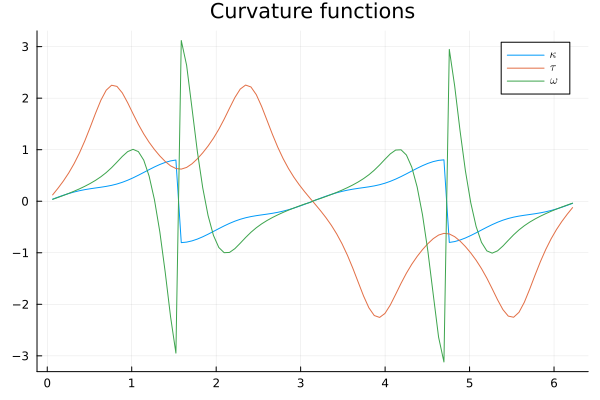

In [407]:
plot(t[begin+1:end-1], reshape(reinterpret(Float64, (t -> diffApparatus(x, t)[2:4]).(ts[begin+1:end-1])), (3,:))', label=["\$\\kappa\$" "\$\\tau\$" "\$\\omega\$"], title="Curvature functions")

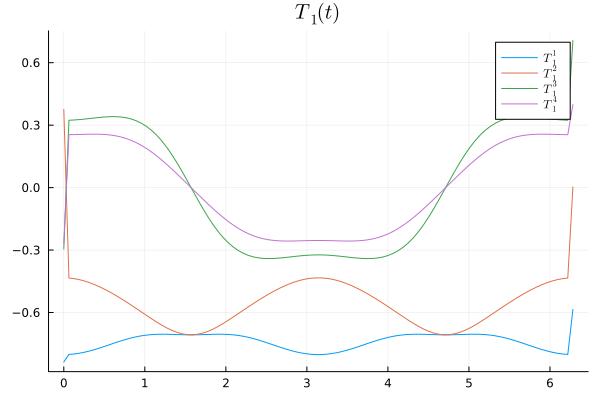

In [390]:
plot(t, reduce(hcat, (t -> diffFrame(x, t)[:,1]).(ts))', label=["\$T_1^1\$" "\$T_1^2\$" "\$T_1^3\$" "\$T_1^4\$"], title="\$T_1(t)\$")

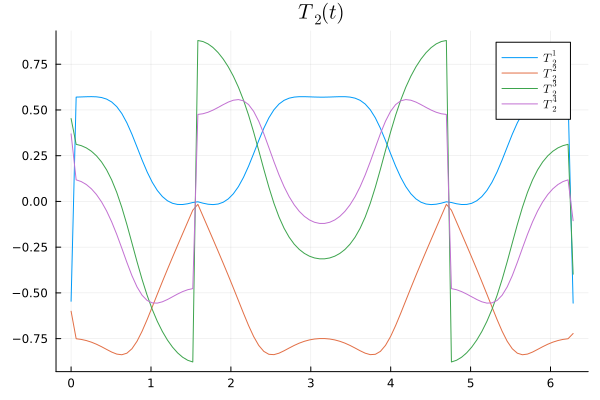

In [391]:
plot(t, reduce(hcat, (t -> diffFrame(x, t)[:,2]).(ts))', label=["\$T_2^1\$" "\$T_2^2\$" "\$T_2^3\$" "\$T_2^4\$"], title="\$T_2(t)\$")

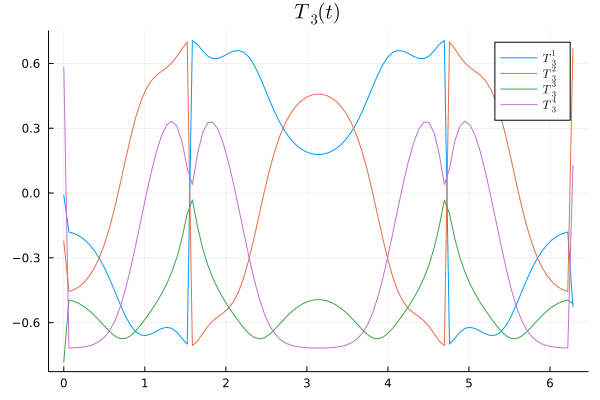

In [392]:
plot(t, reduce(hcat, (t -> diffFrame(x, t)[:,3]).(ts))', label=["\$T_3^1\$" "\$T_3^2\$" "\$T_3^3\$" "\$T_3^4\$"], title="\$T_3(t)\$")

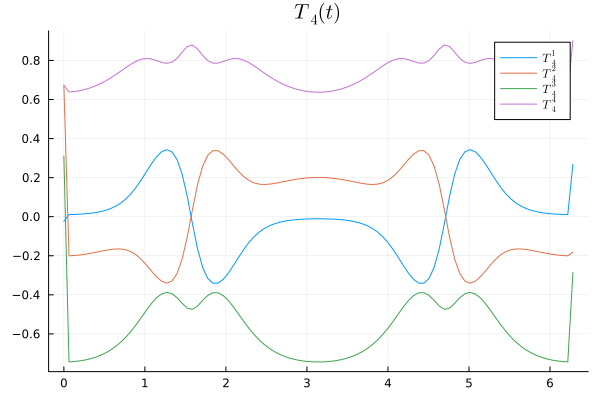

In [393]:
plot(t, reduce(hcat, (t -> diffFrame(x, t)[:,4]).(ts))', label=["\$T_4^1\$" "\$T_4^2\$" "\$T_4^3\$" "\$T_4^4\$"], title="\$T_4(t)\$")